In [520]:
from datetime import datetime as dt, timedelta as td
import requests
import json
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

Contents
- [Introduction](#Introduction)
- [Requirements](#Requirements)
- [Contributors](#Contributors)
- [Operations](#Operations)

# Introduction

Every platform that coordinates users and producers around some end product or service faces two fundamental types of constraints: informational and incentive. (Example) It follows that in evaluating any platform, we must first assess its ability to communicate widely dispersed information about the desires and the resources of different individuals; and, second, assess the incentive mechanism that provident activity organizes around. 

In constructing a technology platform we can address both of these constraints by using a token and transparently sharing information on the resources and work that go into selling it to users. A token can represents anything, but in this instance we use a token as mechanism of alligning incentives around user fullfillment. A token here is assumed to represent a user and what he or she is willing to pay for access to the platforms services.  Tokens are created in accordance with the networks adoption rate and distributed in proportion to the contributions of each producer on the platform. And unlike most token models, which assume that the token is purchased and exchanged for access to platform services, this token is simply purchased and held. Token ownership confers access and it is exclusively transferable, in the same way as a physical good. From the perspective of ownership it is a product but from a utility perspective it is still a bundle of services, the quality of which improves over time with continued development and user growth.

We can take this approach of continued ownership and perpetual access when the services provisioned has a low initial fixed cost and negligible marginal cost. We see this with 


What if instead of buying  This would work for 


and in general fixed costs continue to decline. The entire mode of information production is that you just incur costs up front; that is assuming you build it right the first time.


Platforms should create sustaining protocols that developers can build on, application owners should be able to 
this is in constrast to the reccuring payments we are accustomed to with the subscription fee model. This asymmetry is precisely how these companies generate profit. 

But in a fully efficient market there is no profit, and the purpose of a token and transparency is the realization of improved market efficiency. We assume that profit margins should converge to zero over time and that passive investors become less relevant. 


Since startups increasingly need less money to get their products into users' hands, we must ask ourselves whether we are approaching a tipping point at which capital is sourced entirely from consumers, without the need for outside investors. Is that not the epitome of efficiency in capital formation? Unfortunately, we find a prodigious impediment to efficiency presented by the complexity of our institutional matrix. Enforcement of contracts and conduct is costly. But the cost become negligble when you strip down the process of enforcement to its core component: information and communicaiton technology. Bitcoin provided the first platform to coordinate institutional arrangements (e.g. property rights and contracts) entirely through communication technology and without the needs of any nations court system. 

# Requirements

Ideally we want to cut down on the time it takes for user fullfillment. When a user registers we are presented with a customer we know little about. From whatever referential data we can acquire, we attempt to piece together the user's preferences. But why should we guess what the user wants? Why should users not openly provide that information to contributors? There's not much preventing and improved line of communication between users and producers, except that specifying requirements takes time, a cost which must be offset by some incentive. 

We want users to provide the requirements instead of contributors producing some ostensibly reasonable estimation themselves. We can incentivize them in two ways; offering them extended free access passed some trial period or more directly providing a rebate if their feedback yields actionable insights. The first incentive is the service, the second is the token. We use the token to incentivize communication between users and contributors, and use it further to incentize contributors to produce the desired requirements. 

When a user registers and a token is created the network holds onto the token. The registration process may entail some requirements gathering. All of these requirements then get linked to this user token. The network knows that the token is ready to be released for purchase when contributors have finished all of the specified tasks that yield the satisfaction of requirements. The token is then distributed to contributors in proportion to the work provided.

Lets assume for a second that we have knowledge of the full universe of user requirements and the prices at which users were willing to pay for their satisfaction. We can easily conceive of a budget for each requirement and enter into the provision of those services if the estimated cost of developmnet is less than the amount users are willing to spend.

We start with a univers of 1000 requirements

In [1102]:
requirements = pd.DataFrame(index=range(100))

In [1103]:
def inspect_variable(df, column):
    plt.subplots()
    df[column].plot()
    plt.subplots()
    df[column].hist()
    plt.subplots()
    df.sort_values(column, ascending=False).reset_index()[column].cumsum().plot()
    return df[column].describe().to_frame().T


Each requirement has a number of tasks that must be completed in order for the requirement to be satisfied. We assume the requirements follow a moderate power law distribution.

,count,mean,std,min,25%,50%,75%,max
task_count,100.0,5.98,1.490576,5.0,5.0,5.0,7.0,10.0


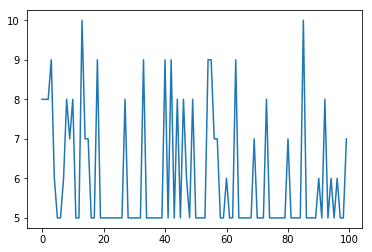

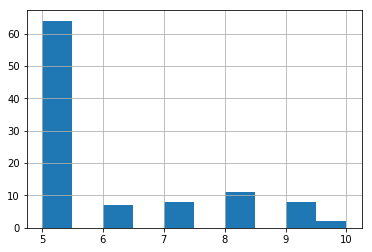

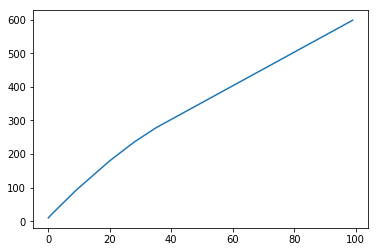

In [1304]:
requirements['task_count'] = (np.random.power(.6, len(requirements)) * 10).round()
requirements['task_count'] = requirements.task_count.apply(lambda n: n if n >= 5 else 5)
inspect_variable(requirements, 'task_count')


,count,mean,std,min,25%,50%,75%,max
task_size_mean,100.0,1.96,1.406479,1.0,1.0,1.0,2.25,6.0


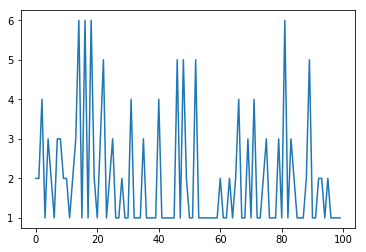

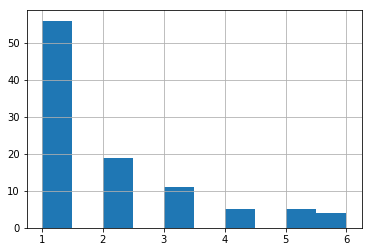

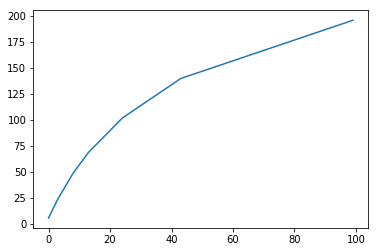

In [1360]:
requirements['task_size_mean'] = (np.random.power(.3, len(requirements)) * 5).round()+1
inspect_variable(requirements, 'task_size_mean')

,count,mean,std,min,25%,50%,75%,max
total_size,100.0,11.59,8.742206,5.0,5.0,9.0,15.0,48.0


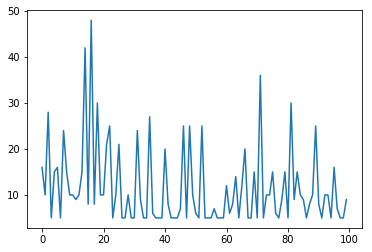

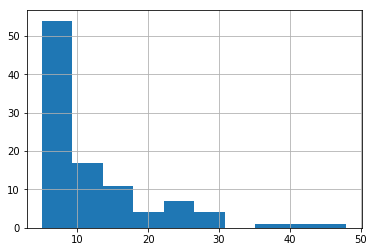

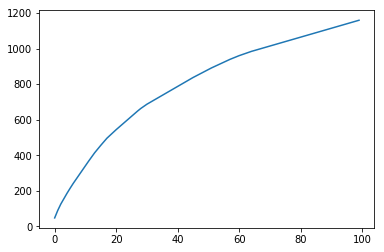

In [1361]:
requirements['total_size'] = requirements.task_count * requirements.task_size_mean
inspect_variable(requirements, 'total_size')

,count,mean,std,min,25%,50%,75%,max
theme,100.0,2.94,1.698603,1.0,1.0,2.0,4.0,6.0


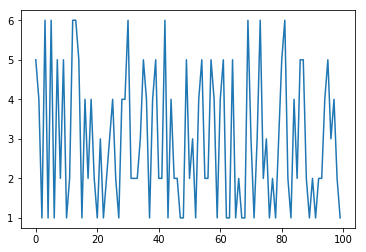

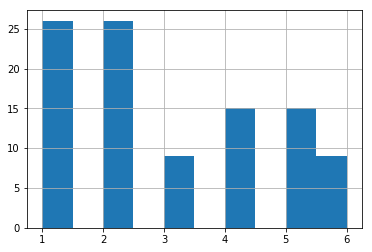

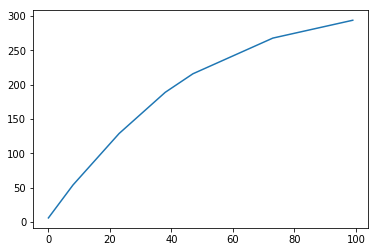

In [1365]:
requirements['theme'] = (np.random.power(.6, len(requirements)) * 5).round()+1
inspect_variable(requirements, 'theme')



,count,mean,std,min,25%,50%,75%,max
price,100.0,60.800176,56.830841,0.04588,18.642476,45.764124,86.265473,294.914446


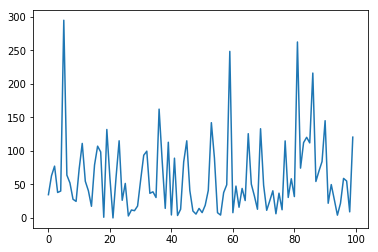

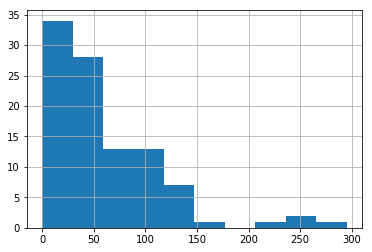

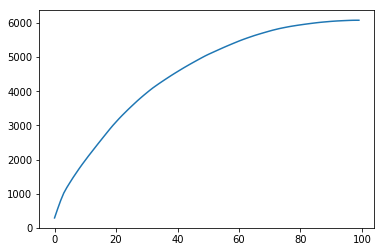

In [1332]:
requirements['price'] = requirements.theme * np.random.power(.7, len(requirements)) * 50
inspect_variable(requirements, 'price')

,count,mean,std,min,25%,50%,75%,max
quality,100.0,0.308804,0.290343,0.000004,0.045019,0.22788,0.493393,0.984324


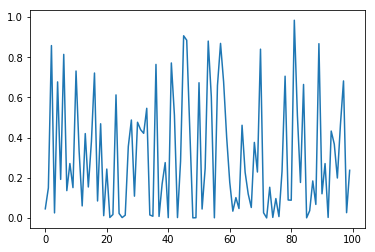

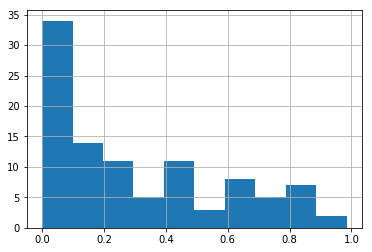

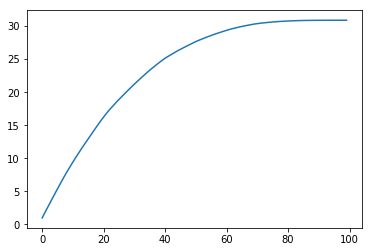

In [1555]:
requirements['quality'] = np.random.power(.4, len(requirements))
inspect_variable(requirements, 'quality')

In [ ]:
requirements['user_pct'] = (np.random.power(.4, len(requirements)))*.6
requirements['user_pct'] = requirements.user_pct / requirements.user_pct.sum()
inspect_variable(requirements, 'user_pct')

,count,mean,std,min,25%,50%,75%,max
potential_income,100.0,8.879859,14.727967,0.000152,0.608977,2.796395,9.216052,77.678819


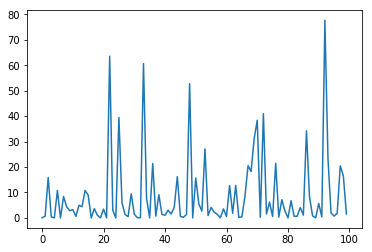

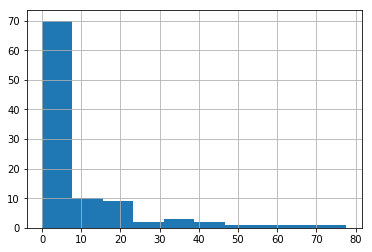

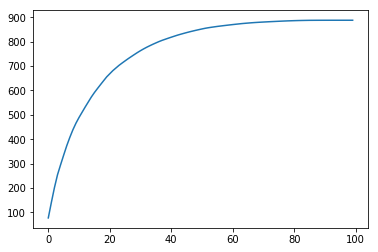

In [1461]:
requirements['potential_income'] = requirements.user_pct * requirements.price
inspect_variable(requirements, 'potential_income')

# Contributors

Any user can contribute to service provision. We define the full universe of contributers below:

In [1419]:
contributors = pd.DataFrame(index=range(1000))

Contributors have a production rate that describes the number production units (task size) that they can complete in a week. We assume very wide dispersion in productivity. 

,count,mean,std,min,25%,50%,75%,max
production_rate,1000.0,3.437063,5.126952,4.587458e-13,0.018382,0.589908,5.175407,19.810842


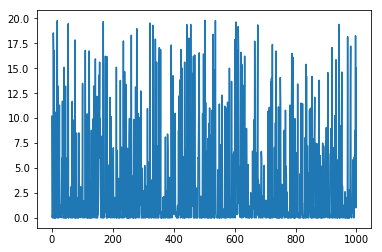

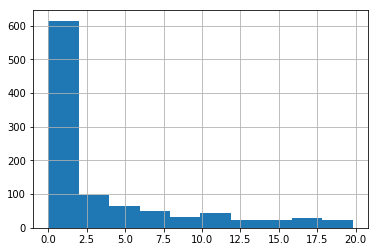

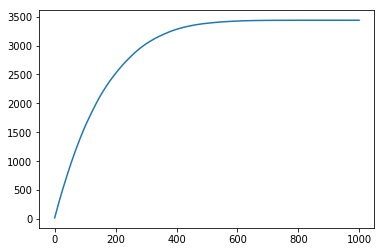

In [1420]:
contributors['production_rate'] = np.random.power(.2, size=len(contributors)) * 20
inspect_variable(contributors, 'production_rate')

Contributors also have a commitment rate that illustrates what percentage of his time the contributor can commit to working on the requirements of the platform.

,count,mean,std,min,25%,50%,75%,max
commitment_rate,1000.0,0.422265,0.297923,0.000106,0.147647,0.392008,0.68082,0.999585


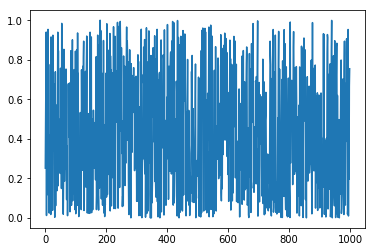

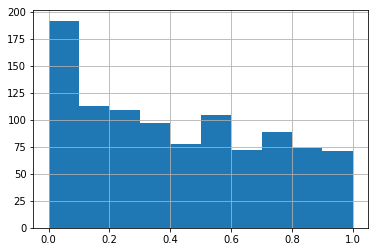

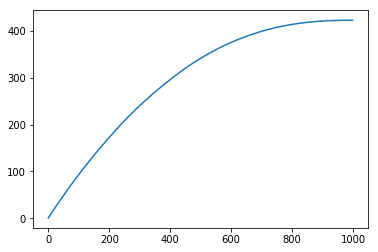

In [1421]:
contributors['commitment_rate'] = np.random.power(.7, size=len(contributors))
inspect_variable(contributors, 'commitment_rate')

Total production: 1448.9281024137429


,count,mean,std,min,25%,50%,75%,max
production_potential,1000.0,1.448928,2.901218,1.332599e-14,0.00362,0.158593,1.291642,19.143247


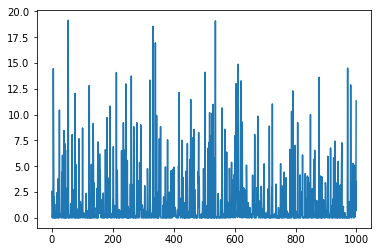

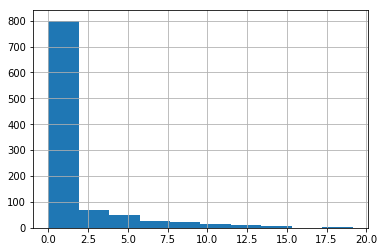

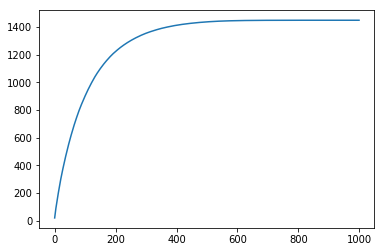

In [1422]:
contributors['production_potential'] = contributors.commitment_rate * contributors.production_rate
print('Total production: {}'.format(contributors.production_potential.sum()))
inspect_variable(contributors, 'production_potential')

# Operations

In [1423]:
operations = pd.DataFrame()
operations['week'] = pd.DatetimeIndex(start=start, end=end, freq='1W')
#inspect_variable(operation, 'week')

,count,mean,std,min,25%,50%,75%,max
free_conversion_rate,52.0,0.019784,0.00906,0.001942,0.01278,0.019102,0.025912,0.03942


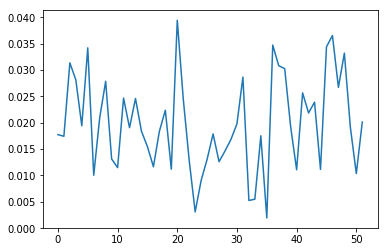

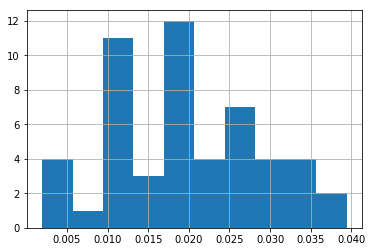

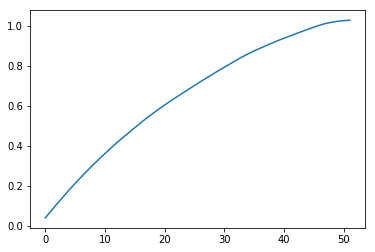

In [1424]:
operations['free_conversion_rate'] = np.random.normal(.02, .02*.5, len(operations))
inspect_variable(operations, 'free_conversion_rate')


,count,mean,std,min,25%,50%,75%,max
premium_conversion_rate,52.0,0.191013,0.106244,-0.086223,0.134202,0.197458,0.260216,0.392577


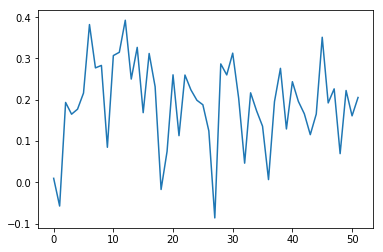

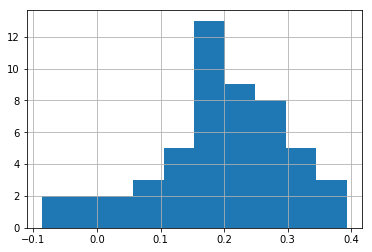

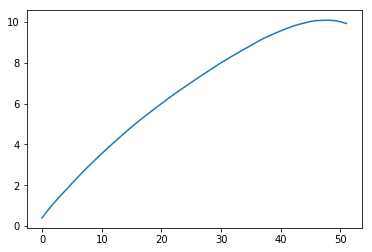

In [1425]:
operations['premium_conversion_rate'] = np.random.normal(premium_conversion_rate, (premium_conversion_rate * .5), len(operations))
inspect_variable(operations, 'premium_conversion_rate')


,count,mean,std,min,25%,50%,75%,max
exposure_rate,52.0,0.019231,0.025443,0.0,0.001056,0.007358,0.029672,0.114689


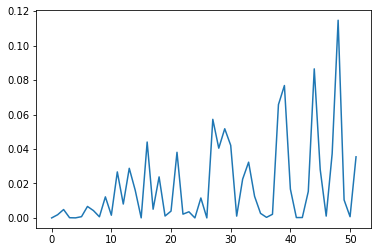

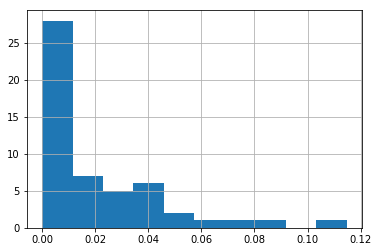

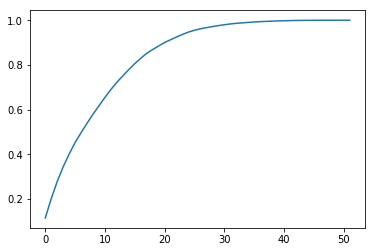

In [1426]:
operations['exposure_rate'] = (
    (np.random.power(.4, len(operations)) * np.linspace(0, 1, num=len(operations)))
)
operations['exposure_rate'] = operations.exposure_rate / operations.exposure_rate.sum()
inspect_variable(operations, 'exposure_rate')

,count,mean,std,min,25%,50%,75%,max
exposure,52.0,36196.544058,30976.820826,0.0,8926.30169,24586.65897,59578.610549,100000.0


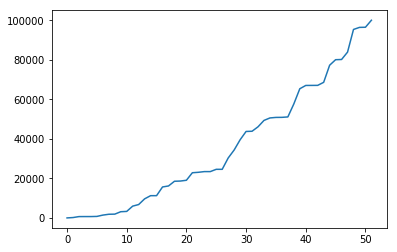

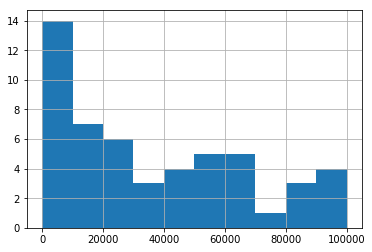

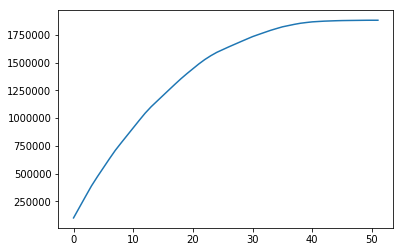

In [1428]:
target_exposure = 100e3
operations['exposure'] = (
    operations.exposure_rate
    * target_exposure
).cumsum()
inspect_variable(operations, 'exposure')

,count,mean,std,min,25%,50%,75%,max
user_growth,52.0,38.779542,64.724394,0.0,1.660577,15.165723,60.870995,380.615279


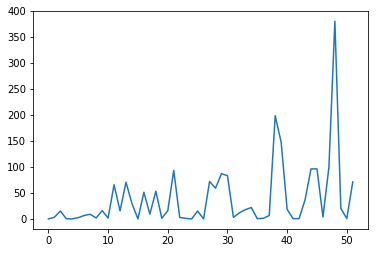

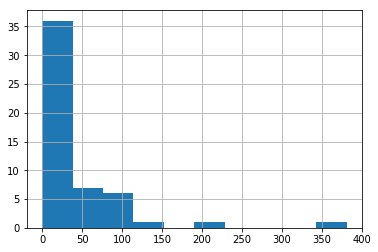

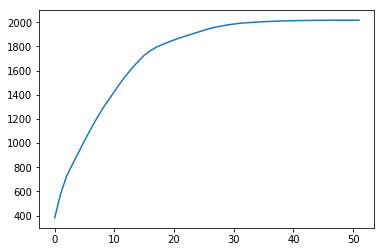

In [1436]:
target_user_count = 100e3
operations['user_growth'] = (
    operations.exposure_rate
    * operations.free_conversion_rate
    * target_user_count
)
inspect_variable(operations, 'user_growth')

,count,mean,std,min,25%,50%,75%,max
churn,52.0,0.001002,0.000915,-0.000781,0.000358,0.000875,0.001752,0.003091


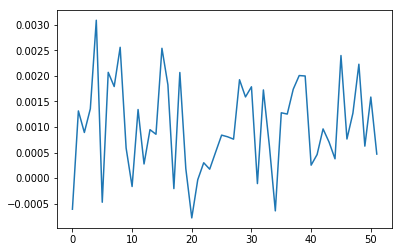

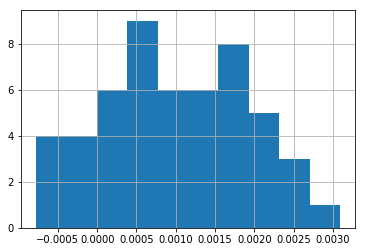

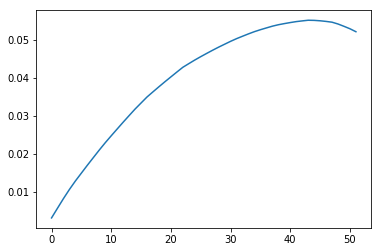

In [1450]:
operations['churn'] = np.random.normal(.001, 0.001, len(operations))
inspect_variable(operations, 'churn')


,count,mean,std,min,25%,50%,75%,max
user_count,52.0,670.113755,584.21369,0.00061,190.767312,481.013216,1081.057564,2016.484054


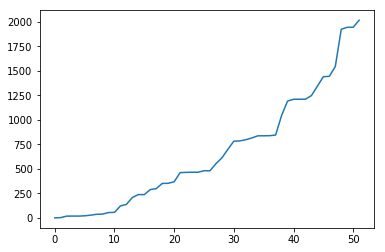

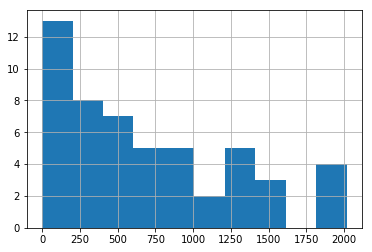

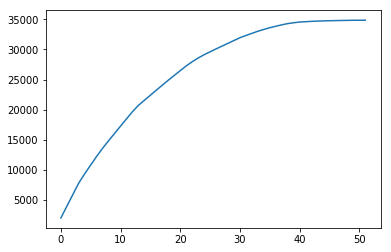

In [1553]:
operations['user_count'] = (operations.user_growth - operations.churn).cumsum()
inspect_variable(operations, 'user_count')

,count,mean,std,min,25%,50%,75%,max
requirement_count,52.0,33.232224,28.971847,0.0,9.460879,23.854612,53.611539,100.0


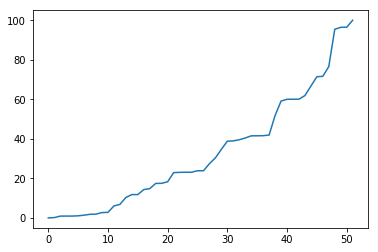

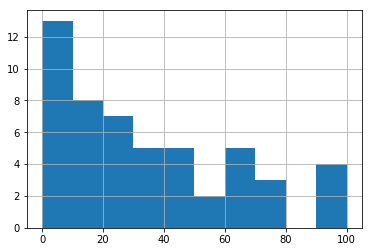

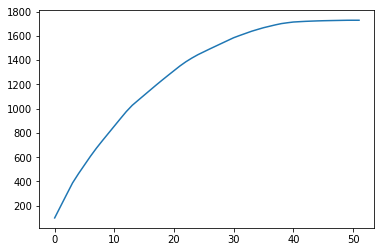

In [1447]:
operations['requirement_count'] = len(requirements) * (operations.user_growth.cumsum() / operations.user_growth.sum())
inspect_variable(operations, 'requirement_count')


,count,mean,std,min,25%,50%,75%,max
contributor_count,52.0,305.526172,262.312638,0.105856,86.35777,251.716829,511.688184,994.95714


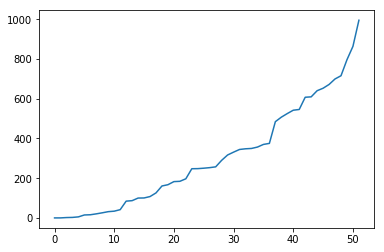

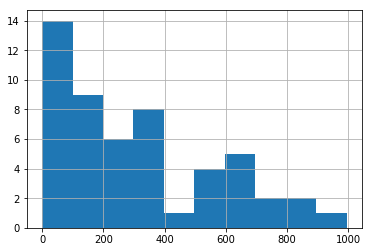

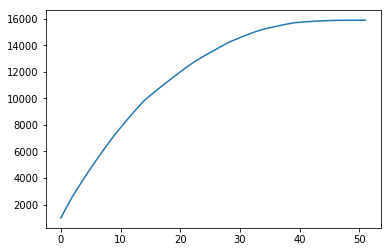

In [1454]:
operations['contributor_count'] = (
    len(contributors) 
    * np.sort(np.random.power(0.5, size=len(operations)))
    #* np.random.normal(1, .3, size=len(operations))
)
inspect_variable(operations, 'contributor_count')

In [1556]:

requirements = requirements.sample(frac=1).reset_index(drop=True)
contributors = contributors.sample(frac=1).reset_index(drop=True)
def get_contributor_start_date(contributor):
    periods = operations[operations.contributor_count>=contributor.name]
    return periods.iloc[0].week if not periods.empty else None
contributors['start_date'] = contributors.apply(get_contributor_start_date, axis=1)

def get_requirements(week_num):
    ops = operations.loc[week_num]
    
    operations[:ops.name].set_index('week').user_growth.plot() 
    
    current_contributors = contributors.loc[:ops.contributor_count] 
    current_contributors['production'] = current_contributors.apply(lambda c: (ops.week - c.start_date).days/7/len(operations)*c.production_potential, axis=1)
    
    current_requirements = requirements.loc[:ops.requirement_count]
    current_requirements['roi'] = current_requirements.potential_income / current_requirements.total_size
    completed = current_requirements[
        current_requirements.total_size.cumsum()<current_contributors.production.sum()
    ]
    todo = current_requirements[
        current_requirements.total_size.cumsum()>=current_contributors.production.sum()
    ]
    


    grouped = current_requirements.groupby('theme')
    agenda = pd.DataFrame()
    premium_conversion_rate = .2
    agenda['price'] = grouped.price.quantile(premium_conversion_rate)
    agenda['users'] = grouped.user_pct.mean() * ops.exposure
    agenda['potential_income'] = agenda.price * agenda.users
    agenda['total_size'] = (
        (grouped.task_size_mean.count()*grouped.task_size_mean.mean())
        +(grouped.task_count.count()*grouped.task_count.mean())
    )
    agenda['roi'] = agenda.potential_income / agenda.total_size
    agenda = agenda.sort_values('roi', ascending=False)
    
    print(current_contributors.production.sum())
    return completed

interact(get_requirements, week_num=30)

interactive(children=(IntSlider(value=30, description='week_num', max=90, min=-30), Output()), _dom_classes=('…

<function __main__.get_requirements(week_num)>

In [1557]:
completed_req_ids = set()
completed_req_ids.intersection()

set()

102.76304788092642


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,task_count,task_size_mean,theme,price,user_count,total_size,user_pct,potential_income,quality
0,5.0,5.0,3.0,7.830786,4552.0,25.0,0.000131,4.390958,0.461415
1,8.0,6.0,5.0,3.658649,171.0,48.0,0.018193,0.613526,0.135926


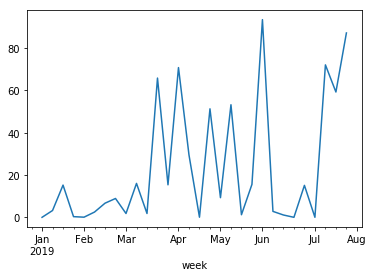

In [1560]:
ops = operations.loc[30]

operations[:ops.name].set_index('week').user_growth.plot() 
    
current_contributors = contributors.loc[:ops.contributor_count] 
current_contributors['production'] = current_contributors.apply(lambda c: (ops.week - c.start_date).days/7/len(operations)*c.production_potential, axis=1)

current_requirements = requirements.loc[:ops.requirement_count]
#current_requirements['roi'] = current_requirements.potential_income / current_requirements.total_size
completed = current_requirements[
    current_requirements.total_size.cumsum()<current_contributors.production.sum()
]
newly_completed = set(completed.index).difference(completed_req_ids)
new_tokens = completed.loc[newly_completed].user_pct * ops.exposure
completed_req_ids.update(completed.index)
"""

todo = current_requirements[
    current_requirements.total_size.cumsum()>=current_contributors.production.sum()
]

grouped = current_requirements.groupby('theme')
agenda = pd.DataFrame()
premium_conversion_rate = .2
agenda['price'] = grouped.price.quantile(premium_conversion_rate)
agenda['users'] = grouped.user_pct.mean() * ops.exposure
agenda['potential_income'] = agenda.price * agenda.users
agenda['total_size'] = (
    (grouped.task_size_mean.count()*grouped.task_size_mean.mean())
    +(grouped.task_count.count()*grouped.task_count.mean())
)
agenda['roi'] = agenda.potential_income / agenda.total_size
agenda = agenda.sort_values('roi', ascending=False)

"""
print(current_contributors.production.sum())
completed


In [1565]:
completed.loc[newly_completed]

,task_count,task_size_mean,theme,price,user_count,total_size,user_pct,potential_income,quality
1,8.0,6.0,5.0,3.658649,171.0,48.0,0.018193,0.613526,0.135926


In [1562]:
new_tokens.sum().round()

796.0

In [1563]:
completed_req_ids

{0, 1}

In [1479]:
(completed.potential_income * ops.exposure).to_frame()

,potential_income
0,78994.550036
1,20291.701940
2,11340.054132


In [1478]:
agenda['roi'] = agenda.potential_income / agenda.total_size
agenda.sort_values('roi', ascending=False)

,price,users,potential_income,total_size,roi
theme,,,,,
6.0,37.984808,7868.405015,298879.856146,8.0,37359.982018
4.0,25.251558,3079.366988,77758.813033,12.0,6479.901086
5.0,25.947812,2291.935333,59470.706074,21.0,2831.938384
3.0,7.947781,1620.958238,12883.021193,8.0,1610.377649
2.0,12.448755,2537.475394,31588.409338,36.0,877.455815
1.0,20.413679,2370.921020,48399.221416,60.0,806.653690


In [1403]:
grouped.describe().T

theme                          1.0           2.0           3.0           4.0  \
price          count     25.000000     23.000000      8.000000     13.000000   
               mean      62.606299     62.742382     44.400443     59.366809   
               std       52.952343     69.438849     36.829891     45.548889   
               min        2.972315      1.038590      7.830786      0.045880   
               25%       27.866476     14.467705     16.181749     21.907515   
               50%       49.465721     50.350887     44.140116     74.306179   
               75%       89.353133     81.286061     52.317464    107.090247   
               max      216.141521    262.494742    120.529316    114.934885   
task_count     count     25.000000     23.000000      8.000000     13.000000   
               mean       6.160000      5.869565      6.625000      5.307692   
               std        1.598958      1.358621      1.995531      1.109400   
               min        5.000000      5.000000      5.000000      5.000000   
               25%        5.000000      5.000000      5.000000      5.000000   
               50%        5.000000      5.000000      6.000000      5.000000   
               75%        7.000000      7.000000      7.500000      5.000000   
               max       10.000000      9.000000     10.000000      9.000000   
task_size_mean count     25.000000     23.000000      8.000000     13.000000   
               mean       1.920000      2.130435      2.000000      1.846154   
               std        1.382027      1.516705      1.414214      1.573010   
               min        1.000000      1.000000      1.000000      1.000000   
               25%        1.000000      1.000000      1.000000      1.000000   
               50%        1.000000      1.000000      1.500000      1.000000   
               75%        3.000000      3.000000      2.250000      2.000000   
               max        5.000000      6.000000      5.000000      6.000000   
total_size     count     25.000000     23.000000      8.000000     13.000000   
               mean      11.480000     13.130435     12.125000      9.538462   
               std        7.773459     10.947413      7.019107      7.763326   
               min        5.000000      5.000000      5.000000      5.000000   
               25%        5.000000      5.000000      8.500000      5.000000   
               50%        8.000000      9.000000     10.000000      5.000000   
               75%       15.000000     18.000000     12.750000     10.000000   
               max       27.000000     42.000000     25.000000     30.000000   
user_count     count     25.000000     23.000000      8.000000     13.000000   
               mean   15411.760000  20626.000000   5283.000000  15101.153846   
               std    22973.854054  26558.183885   5603.612840  26450.393409   
               min        1.000000      2.000000      3.000000      1.000000   
               25%      193.000000    293.500000    726.750000    126.000000   
               50%     7218.000000  12135.000000   4728.000000   3417.000000   
               75%    14349.000000  31109.000000   6829.500000  15798.000000   
               max    82960.000000  98211.000000  16676.000000  95500.000000   
user_pct       count     25.000000     23.000000      8.000000     13.000000   
               mean       0.118299      0.164030      0.183697      0.121795   
               std        0.150452      0.159915      0.203999      0.145095   
               min        0.000035      0.002400      0.000381      0.003105   
               25%        0.008203      0.038603      0.029145      0.007304   
               50%        0.048457      0.129170      0.093205      0.093436   
               75%        0.190247      0.246784      0.336018      0.161739   
               max        0.567430      0.598345      0.560730      0.469386   

theme                          5.0           6.0  
price          count     14.

In [1145]:
requirement_count

100

In [681]:
ops = operation.loc[5]
current_theme = agenda.index[0]

theme_requirements = grouped.get_group(current_theme).sort_values('user_count', ascending=False)#.user_count.rank(pct=True)
theme_requirements['total_size'] = theme_requirements.task_count * theme_requirements.task_size_mean
#theme_requirements['cum_size'] = theme_requirements.total_size.cumsum()
todo = theme_requirements[theme_requirements.total_size.cumsum()>=operation.loc[:ops.name].tasks_completed.sum()]

user_satisfaction_ratio = 1 - (todo.user_count.sum() / theme_requirements.user_count.sum())
if user_satisfaction_ratio >= .8
    current_theme






In [1059]:
start = dt(2019,1,1)
end = dt(2020,1,1)
target_output = agenda.total_size.iloc[:2].sum()

operation = pd.DataFrame()
operation['week'] = pd.DatetimeIndex(start=start, end=end, freq='1W')

operation['free_conversion_rate'] = np.random.normal(.02, .03, len(operation))
operation['premium_conversion_rate'] = np.random.normal(premium_conversion_rate, (premium_conversion_rate * .75), len(operation))
operation['exposure_rate'] = (
    (np.random.power(.4, len(operation)) * np.linspace(0, 1, num=len(operation)))
)
operation['exposure_rate'] = operation.exposure_rate / operation.exposure_rate.sum()
#operation['user_count'] = (operation.exposure_rate * agenda.users.sum() * (1-user_overlap_ratio)).cumsum()

operation['tasks_completed'] = (commits_df.total / commits_df.total.sum()) * target_output
# a function of development being completed 
#operation['total_token_supply'] 
#operation['sell_orders']
#operation['buy_orders']
#operation['network_effect'] = 
# a function of cummulative price point of requirements plus some network externalities
#operation['token_price']



In [ ]:
def git_commit_stats(repo_owner, repo):
    base_url = 'https://api.github.com/'
    url = '{}repos/{}/{}/stats/commit_activity?limit=10'.format(base_url, repo_owner, repo)
    response = json.loads(requests.get(url).text)
    return response

repos = {
    'ethereum': ('ethereum','go-ethereum'),
    'decred': ('decred', 'dcrd'),
    'bitshares': ('bitshares','bitshares-core'),
    'eos': ('EOSIO','eos')
}

commit_stats = git_commit_stats(*repos['ethereum'])
commits_df = pd.DataFrame(commit_stats)
((commits_df.total / commits_df.total.sum()) * agenda.total_size.iloc[0]).plot()

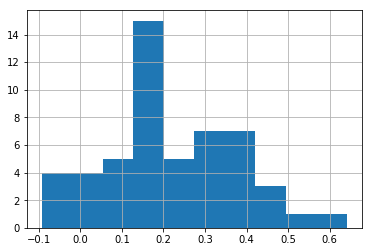

In [678]:
operation.premium_conversion_rate.hist()

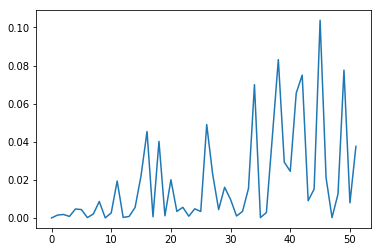

In [679]:
operation.exposure_rate.plot()

In [680]:
ops = operation.loc[20]

In [682]:
todo.user_count.sum() / theme_requirements.user_count.sum()

0.28643875617408593

In [683]:
theme_requirements

,task_count,task_size_mean,theme,price,user_count,total_size
53,5.0,5.0,1.0,10.541820,51884.0,25.0
99,21.0,1.0,1.0,3.362780,25509.0,21.0
13,10.0,2.0,1.0,39.745580,14488.0,20.0
49,16.0,5.0,1.0,0.807189,7046.0,80.0
84,13.0,1.0,1.0,7.704872,6123.0,13.0
57,5.0,1.0,1.0,26.010395,5842.0,5.0
8,5.0,1.0,1.0,13.699924,5289.0,5.0
6,25.0,4.0,1.0,0.259331,4112.0,100.0
46,7.0,2.0,1.0,16.867205,3273.0,14.0
62,5.0,2.0,1.0,10.576579,2054.0,10.0


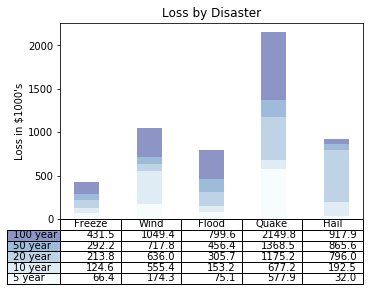

In [825]:

data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()